In [63]:
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier

import seaborn as sns

import matplotlib.pyplot as plt

Hypothesis: 
<br>What is expected to happen: 
<br>Why expect it to happen: 

Goal : predict probability of the target loan_status

What was done:
1. modifying the loan_percent_income column multiply by 10
2. encode categorical features
3. check for null values
4. check for outliers and remove outliers
5. 

In [2]:
path = 'C:/Users/mozulkifli/Downloads/mydocs/playground-series-s4e10/'
training_file = 'train.csv'

In [3]:
df = pd.read_csv(path + training_file)
df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [4]:
df.shape

(58645, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [6]:
df.describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,29322.000000,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,16929.497605,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,0.000000,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,14661.000000,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,29322.000000,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,43983.000000,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,58644.000000,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


the loan_percent_income = loan_ammount / person income
the column was wrongly calculated, example:

30,000 divided by 9,600 we should receive 3.13, but the column loan_percent_income shows 0.31. So to handle this problem the column loan_percent_income was multiplied by 10.

In [8]:
df['loan_percent_income'] = df['loan_percent_income'] * 10
df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,1.7,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.7,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,2.1,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,1.7,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,1.0,N,3,0


- Label encoding - for ordinal features
- One-hot encoding - for nominal features

In [12]:
# label encoding loan_grade
df2 = df

le = LabelEncoder()
df2['loan_grade_encoded'] = le.fit_transform(df2['loan_grade'])
df2.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status,loan_grade_encoded
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,1.7,N,14,0,1
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.7,N,2,0,2
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,2.1,N,10,0,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,1.7,N,5,0,1
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,1.0,N,3,0,0


In [13]:
# one hot encoding nominal categories
df2 = pd.get_dummies(df2, columns=['person_home_ownership', 'loan_intent', 'cb_person_default_on_file'], drop_first=True)
df2.head()

,id,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status,loan_grade_encoded,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y
0,0,37,35000,0.0,B,6000,11.49,1.7,14,0,1,False,False,True,True,False,False,False,False,False
1,1,22,56000,6.0,C,4000,13.35,0.7,2,0,2,False,True,False,False,False,True,False,False,False
2,2,29,28800,8.0,A,6000,8.90,2.1,10,0,0,False,True,False,False,False,False,True,False,False
3,3,30,70000,14.0,B,12000,11.11,1.7,5,0,1,False,False,True,False,False,False,False,True,False
4,4,22,60000,2.0,A,6000,6.92,1.0,3,0,0,False,False,True,False,False,True,False,False,False


In [17]:
# remove the old categorical columns
df3 = df2.drop('loan_grade', axis = 1)
df3.head()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status,loan_grade_encoded,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y
0,0,37,35000,0.0,6000,11.49,1.7,14,0,1,False,False,True,True,False,False,False,False,False
1,1,22,56000,6.0,4000,13.35,0.7,2,0,2,False,True,False,False,False,True,False,False,False
2,2,29,28800,8.0,6000,8.90,2.1,10,0,0,False,True,False,False,False,False,True,False,False
3,3,30,70000,14.0,12000,11.11,1.7,5,0,1,False,False,True,False,False,False,False,True,False
4,4,22,60000,2.0,6000,6.92,1.0,3,0,0,False,False,True,False,False,True,False,False,False


In [22]:
# See number of nulls per column
print(df3.isnull().sum())

# % of null values in each column
print(df3.isnull().mean() * 100)


id                             0
person_age                     0
person_income                  0
person_emp_length              0
loan_amnt                      0
loan_int_rate                  0
loan_percent_income            0
cb_person_cred_hist_length     0
loan_status                    0
loan_grade_encoded             0
person_home_ownership_OTHER    0
person_home_ownership_OWN      0
person_home_ownership_RENT     0
loan_intent_EDUCATION          0
loan_intent_HOMEIMPROVEMENT    0
loan_intent_MEDICAL            0
loan_intent_PERSONAL           0
loan_intent_VENTURE            0
cb_person_default_on_file_Y    0
dtype: int64
id                             0.0
person_age                     0.0
person_income                  0.0
person_emp_length              0.0
loan_amnt                      0.0
loan_int_rate                  0.0
loan_percent_income            0.0
cb_person_cred_hist_length     0.0
loan_status                    0.0
loan_grade_encoded             0.0
person_hom

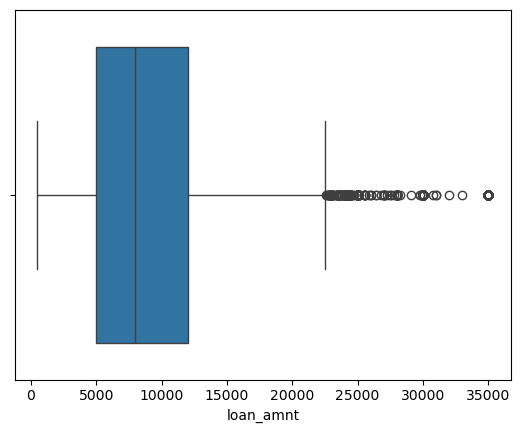

In [35]:
sns.boxplot(x=df3['loan_amnt'])
plt.show()

In [24]:
Q1 = df3['loan_amnt'].quantile(0.25)
Q3 = df3['loan_amnt'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df3[(df3['loan_amnt'] < lower_bound) | (df3['loan_amnt'] > upper_bound)]


In [25]:
df3.shape

(58645, 19)

In [44]:
df_with_outliers = df3

In [43]:
numeric_cols = df3.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    Q1 = df3[col].quantile(0.25)
    Q3 = df3[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df3[(df3[col] < lower) | (df3[col] > upper)]
    print(f"{col}: {len(outliers)} outliers")


id: 0 outliers
person_age: 2446 outliers
person_income: 2411 outliers
person_emp_length: 1274 outliers
loan_amnt: 2045 outliers
loan_int_rate: 34 outliers
loan_percent_income: 1210 outliers
cb_person_cred_hist_length: 1993 outliers
loan_status: 8350 outliers


In [26]:
# Removing the outliers
df4 = df3[(df3['loan_amnt'] >= lower_bound) & (df3['loan_amnt'] <= upper_bound)]
df4.shape

(56600, 19)

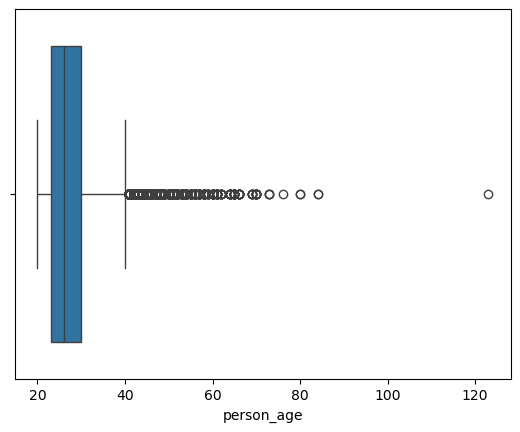

In [27]:
sns.boxplot(x=df4['person_age'])
plt.show()

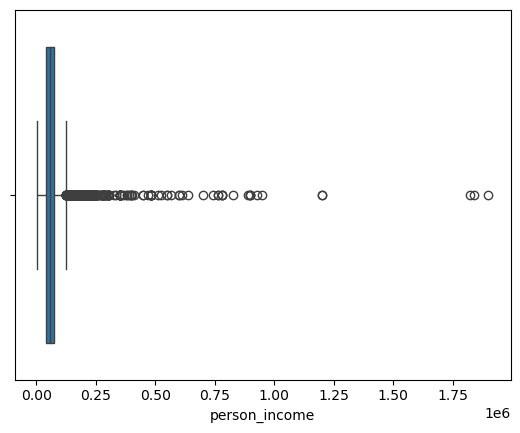

In [28]:
sns.boxplot(x=df4['person_income'])
plt.show()

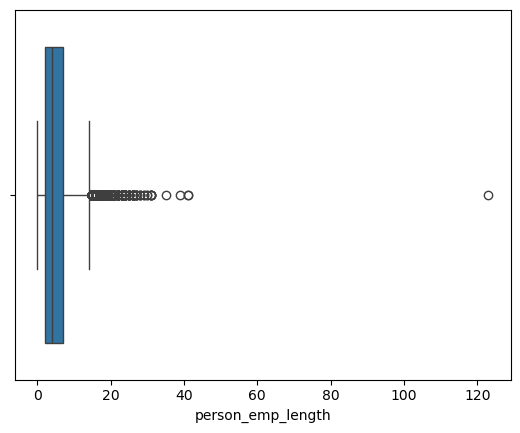

In [30]:
sns.boxplot(x=df4['person_emp_length'])
plt.show()

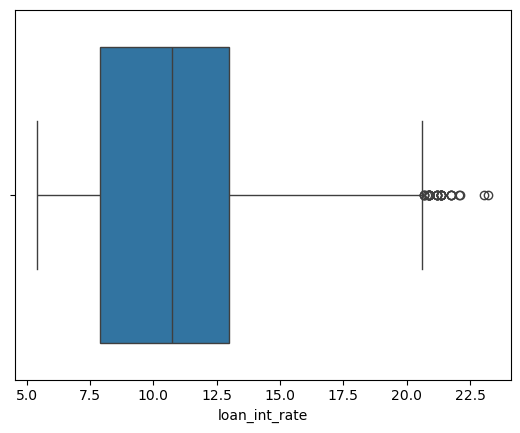

In [31]:
sns.boxplot(x=df4['loan_int_rate'])
plt.show()

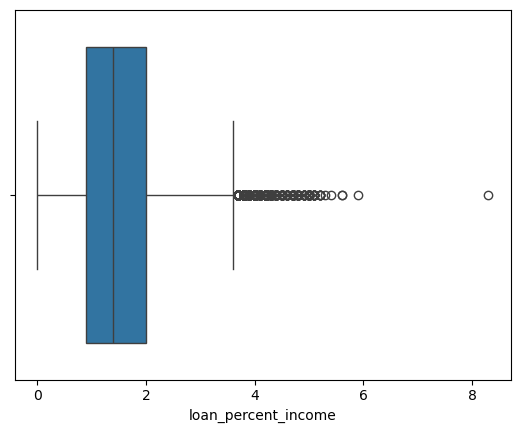

In [32]:
sns.boxplot(x=df4['loan_percent_income'])
plt.show()

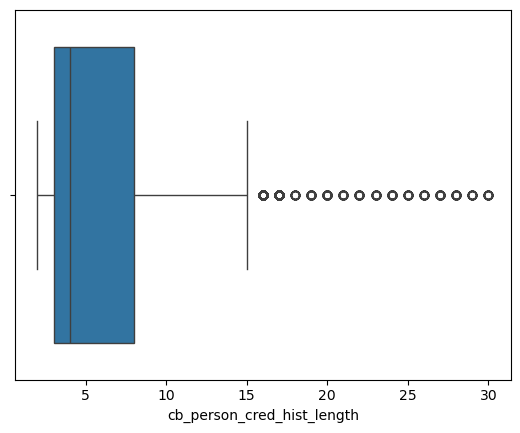

In [33]:
sns.boxplot(x=df4['cb_person_cred_hist_length'])
plt.show()

In [38]:
# remove outliers in person_age

Q1 = df4['person_age'].quantile(0.25)
Q3 = df4['person_age'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df4[(df4['person_age'] < lower_bound) | (df4['person_age'] > upper_bound)]

# Removing the outliers
df4 = df4[(df4['person_age'] >= lower_bound) & (df4['person_age'] <= upper_bound)]
df4.shape

(54271, 19)

In [39]:
# remove outliers in person_income

Q1 = df4['person_income'].quantile(0.25)
Q3 = df4['person_income'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df4[(df4['person_income'] < lower_bound) | (df4['person_income'] > upper_bound)]

# Removing the outliers
df4 = df4[(df4['person_income'] >= lower_bound) & (df4['person_income'] <= upper_bound)]
df4.shape

(52500, 19)

In [40]:
# remove outliers in person_emp_length

Q1 = df4['person_emp_length'].quantile(0.25)
Q3 = df4['person_emp_length'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df4[(df4['person_emp_length'] < lower_bound) | (df4['person_emp_length'] > upper_bound)]

# Removing the outliers
df4 = df4[(df4['person_emp_length'] >= lower_bound) & (df4['person_emp_length'] <= upper_bound)]
df4.shape

(51610, 19)

In [41]:
# remove outliers in loan_int_rate

Q1 = df4['loan_int_rate'].quantile(0.25)
Q3 = df4['loan_int_rate'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df4[(df4['loan_int_rate'] < lower_bound) | (df4['loan_int_rate'] > upper_bound)]

# Removing the outliers
df4 = df4[(df4['loan_int_rate'] >= lower_bound) & (df4['loan_int_rate'] <= upper_bound)]
df4.shape

(51582, 19)

In [59]:
# remove outliers in loan_percent_income

Q1 = df4['loan_percent_income'].quantile(0.25)
Q3 = df4['loan_percent_income'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df4[(df4['loan_percent_income'] < lower_bound) | (df4['loan_percent_income'] > upper_bound)]

# Removing the outliers
df4 = df4[(df4['loan_percent_income'] >= lower_bound) & (df4['loan_percent_income'] <= upper_bound)]
df4.shape

(50152, 19)

In [60]:
df_without_outliers = df4
df_without_outliers.shape

(50152, 19)

In [47]:
# Feature scaling
df5 = df4
numeric_cols = df5.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(numeric_cols)

['id', 'person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'loan_status']


In [50]:
df5 = df5.drop('id', axis = 1)
df5.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status,loan_grade_encoded,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y
0,37,35000,0.0,6000,11.49,1.7,14,0,1,False,False,True,True,False,False,False,False,False
1,22,56000,6.0,4000,13.35,0.7,2,0,2,False,True,False,False,False,True,False,False,False
2,29,28800,8.0,6000,8.90,2.1,10,0,0,False,True,False,False,False,False,True,False,False
3,30,70000,14.0,12000,11.11,1.7,5,0,1,False,False,True,False,False,False,False,True,False
4,22,60000,2.0,6000,6.92,1.0,3,0,0,False,False,True,False,False,True,False,False,False


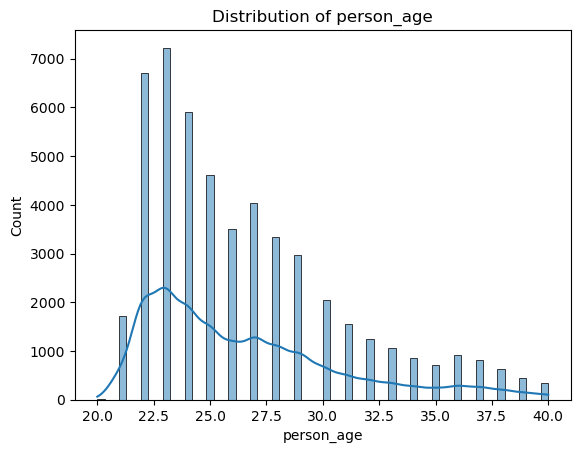

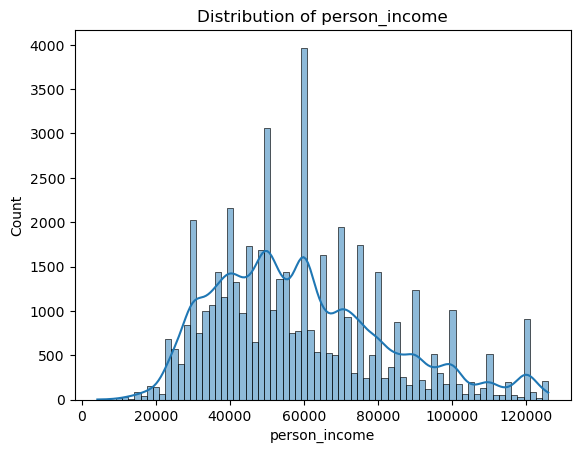

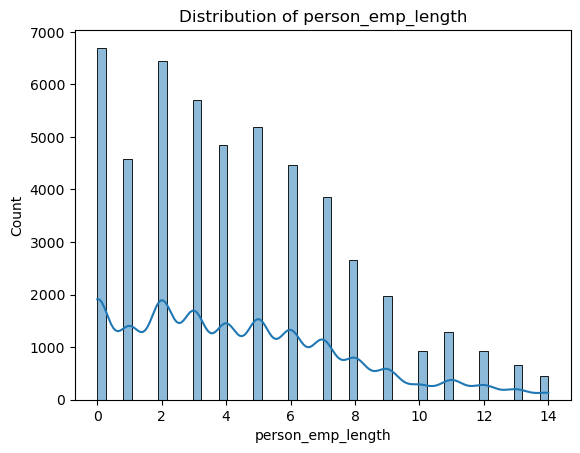

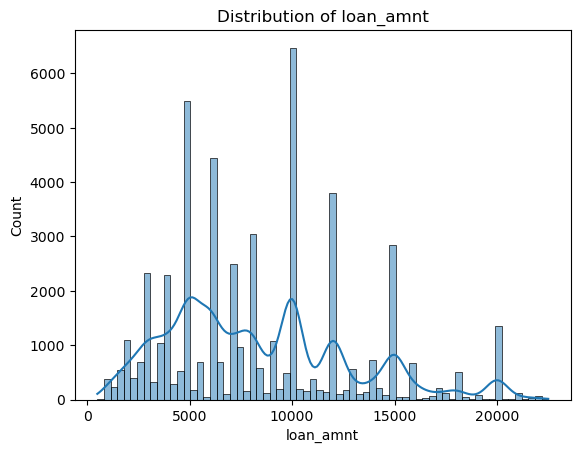

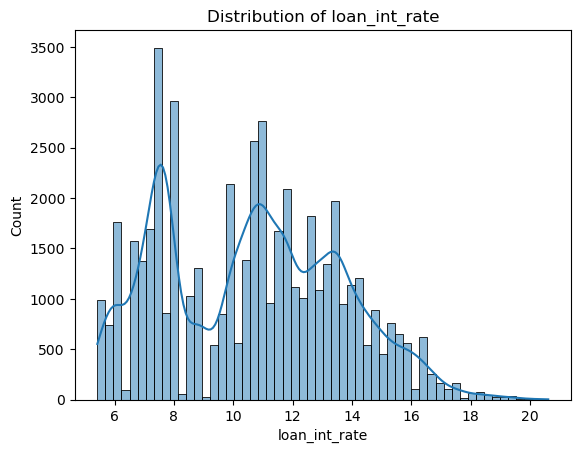

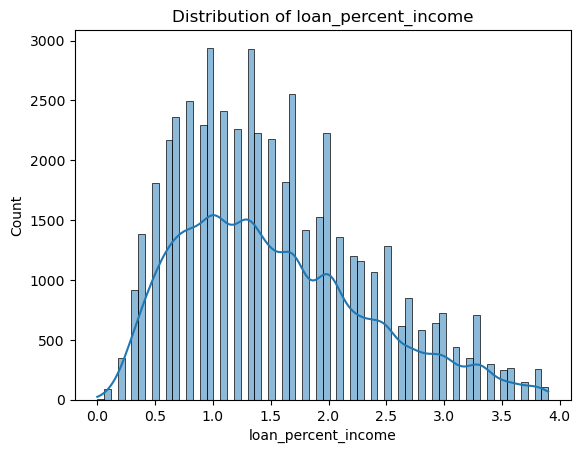

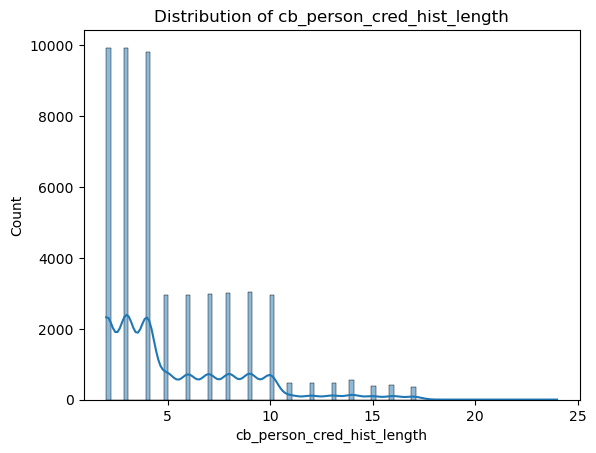

In [51]:
# Step 1: Identify numeric columns
numeric_cols = df5.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Step 2: Identify columns to exclude
# You can customize this list based on your encoding
exclude_cols = ['loan_status']  # Target column (never scale)
binary_cols = [col for col in numeric_cols if df5[col].nunique() == 2]
exclude_cols += binary_cols

# Step 3: Final list of features to scale
scale_cols = [col for col in numeric_cols if col not in exclude_cols]

for col in scale_cols:
    sns.histplot(df5[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


In [53]:
# Define per-column scalers
scalers = {
    'person_age': StandardScaler(),
    'person_income': RobustScaler(),
    'loan_amnt': RobustScaler(),
    'person_emp_length': StandardScaler(),
    'loan_int_rate': StandardScaler(),
    'loan_percent_income': MinMaxScaler(),
    'cb_person_cred_hist_length': StandardScaler()
}

# Apply each scaler to its column
for col, scaler in scalers.items():
    df5[[col]] = scaler.fit_transform(df5[[col]])

In [62]:
df_standardized = df5
df_standardized.shape

(50654, 18)

In [57]:
df_with_outliers.shape

(58645, 19)

In [61]:
df_without_outliers.shape

(50152, 19)

In [64]:
# Example for standardized data
X_std = df_standardized.drop('loan_status', axis=1)
y_std = df_standardized['loan_status']
X_std_train, X_std_test, y_std_train, y_std_test = train_test_split(X_std, y_std, test_size=0.2, random_state=42)

# For with_outliers
X_out = df_with_outliers.drop('loan_status', axis=1)
y_out = df_with_outliers['loan_status']
X_out_train, X_out_test, y_out_train, y_out_test = train_test_split(X_out, y_out, test_size=0.2, random_state=42)

# For without_outliers
X_clean = df_without_outliers.drop('loan_status', axis=1)
y_clean = df_without_outliers['loan_status']
X_clean_train, X_clean_test, y_clean_train, y_clean_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)


In [65]:
def train_and_evaluate_models_from_split(X_train, X_test, y_train, y_test, condition_label):
    from sklearn.linear_model import LogisticRegression
    from sklearn.ensemble import RandomForestClassifier
    from xgboost import XGBClassifier
    from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

    models = {
        "Logistic Regression": LogisticRegression(max_iter=1000),
        "Random Forest": RandomForestClassifier(),
        "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
    }

    results = []

    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        auc = roc_auc_score(y_test, y_pred)
        report = classification_report(y_test, y_pred, output_dict=True)
        cm = confusion_matrix(y_test, y_pred)
        results.append({
            "Condition": condition_label,
            "Model": model_name,
            "ROC AUC": auc,
            "Precision (1)": report['1']['precision'],
            "Recall (1)": report['1']['recall'],
            "Confusion Matrix": cm
        })

    return results


In [66]:
results = []
results += train_and_evaluate_models_from_split(X_out_train, X_out_test, y_out_train, y_out_test, "With Outliers")
results += train_and_evaluate_models_from_split(X_clean_train, X_clean_test, y_clean_train, y_clean_test, "Without Outliers")
results += train_and_evaluate_models_from_split(X_std_train, X_std_test, y_std_train, y_std_test, "Standardized")

# View results
import pandas as pd
results_df = pd.DataFrame(results)
print(results_df[['Condition', 'Model', 'ROC AUC', 'Precision (1)', 'Recall (1)', 'Confusion Matrix']])


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mozulkifli\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [15:09:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number 

          Condition                Model   ROC AUC  Precision (1)  Recall (1)  \
0     With Outliers  Logistic Regression  0.712398       0.739261    0.450670   
1     With Outliers        Random Forest  0.853759       0.917510    0.718027   
2     With Outliers              XGBoost  0.868262       0.898614    0.750305   
3  Without Outliers  Logistic Regression  0.671810       0.720065    0.363265   
4  Without Outliers        Random Forest  0.829143       0.922034    0.666122   
5  Without Outliers              XGBoost  0.839855       0.898089    0.690612   
6      Standardized  Logistic Regression  0.690925       0.727397    0.404417   
7      Standardized        Random Forest  0.828208       0.927660    0.664128   
8      Standardized              XGBoost  0.844745       0.909001    0.699924   

             Confusion Matrix  
0   [[9826, 261], [902, 740]]  
1  [[9981, 106], [463, 1179]]  
2  [[9948, 139], [410, 1232]]  
3   [[8633, 173], [780, 445]]  
4    [[8737, 69], [409, 816]]

C:\Users\mozulkifli\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [15:09:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [67]:
# Set display options for cleaner view
pd.set_option('display.max_colwidth', None)
pd.set_option('display.precision', 4)

# Choose and rename columns for readability
display_columns = [
    'Condition',
    'Model',
    'ROC AUC',
    'Precision (1)',
    'Recall (1)',
    'Confusion Matrix'
]

results_df_formatted = results_df[display_columns].copy()
results_df_formatted.columns = ['Condition', 'Model', 'ROC AUC', 'Precision', 'Recall', 'Confusion Matrix']

# Display the formatted DataFrame
print(results_df_formatted.to_string(index=False))


       Condition               Model  ROC AUC  Precision  Recall           Confusion Matrix
   With Outliers Logistic Regression   0.7124     0.7393  0.4507  [[9826, 261], [902, 740]]
   With Outliers       Random Forest   0.8538     0.9175  0.7180 [[9981, 106], [463, 1179]]
   With Outliers             XGBoost   0.8683     0.8986  0.7503 [[9948, 139], [410, 1232]]
Without Outliers Logistic Regression   0.6718     0.7201  0.3633  [[8633, 173], [780, 445]]
Without Outliers       Random Forest   0.8291     0.9220  0.6661   [[8737, 69], [409, 816]]
Without Outliers             XGBoost   0.8399     0.8981  0.6906   [[8710, 96], [379, 846]]
    Standardized Logistic Regression   0.6909     0.7274  0.4044  [[8619, 199], [782, 531]]
    Standardized       Random Forest   0.8282     0.9277  0.6641   [[8750, 68], [441, 872]]
    Standardized             XGBoost   0.8447     0.9090  0.6999   [[8726, 92], [394, 919]]
